# Projeto Final - Machine Learning

## Alunos:
- Guilherme Fontana Louro
- Pedro Altobelli Teixeira Pinto

## Objetivo
- Criar um modelo de Machine Learning capaz de sugerir uma boa aposta para um jogo de futebol. Essa aposta pode ser o resultado final do jogo, número de gols, cartões, escanteios, etc.

## Dataset
- O dataset utilizado foi o [Football Database](https://www.kaggle.com/datasets/technika148/football-database), disponível no Kaggle. Ele contém dados de jogos de futebol de 11 ligas europeias, desde a temporada 2008/2009 até a 2019/2020. Os dados foram coletados do site [football-data.co.uk](https://www.football-data.co.uk/).

# Análise Exploratória inicial

In [38]:
import pathlib
teams = pathlib.Path.cwd() / '../data/teams.csv'
players = pathlib.Path.cwd() / '../data/players.csv'
teamstats = pathlib.Path.cwd() / '../data/teamstats.csv'
appearances = pathlib.Path.cwd() / '../data/appearances.csv'

In [39]:
import pandas as pd
teams_data = pd.read_csv(teams)
players_data = pd.read_csv(players, encoding='latin-1')
teamstats_data = pd.read_csv(teamstats)
appearances_data = pd.read_csv(appearances)

In [40]:
teams_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   teamID  146 non-null    int64 
 1   name    146 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [41]:
teams_data.head(5)

,teamID,name
0,71,Aston Villa
1,72,Everton
2,74,Southampton
3,75,Leicester
4,76,West Bromwich Albion


In [42]:
players_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7659 entries, 0 to 7658
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   playerID  7659 non-null   int64 
 1   name      7659 non-null   object
dtypes: int64(1), object(1)
memory usage: 119.8+ KB


In [43]:
players_data.head(5)

,playerID,name
0,560,Sergio Romero
1,557,Matteo Darmian
2,548,Daley Blind
3,628,Chris Smalling
4,1006,Luke Shaw


In [44]:
teamstats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25360 entries, 0 to 25359
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gameID         25360 non-null  int64  
 1   teamID         25360 non-null  int64  
 2   season         25360 non-null  int64  
 3   date           25360 non-null  object 
 4   location       25360 non-null  object 
 5   goals          25360 non-null  int64  
 6   xGoals         25360 non-null  float64
 7   shots          25360 non-null  int64  
 8   shotsOnTarget  25360 non-null  int64  
 9   deep           25360 non-null  int64  
 10  ppda           25360 non-null  float64
 11  fouls          25360 non-null  int64  
 12  corners        25360 non-null  int64  
 13  yellowCards    25359 non-null  float64
 14  redCards       25360 non-null  int64  
 15  result         25360 non-null  object 
dtypes: float64(3), int64(10), object(3)
memory usage: 3.1+ MB


In [45]:
teamstats_data.head(5)

,gameID,teamID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result
0,81,89,2015,2015-08-08 15:45:00,h,1,0.627539,9,1,4,13.8261,12,1,2.0,0,W
1,81,82,2015,2015-08-08 15:45:00,a,0,0.674600,9,4,10,8.2188,12,2,3.0,0,L
2,82,73,2015,2015-08-08 18:00:00,h,0,0.876106,11,2,11,6.9000,13,6,3.0,0,L
3,82,71,2015,2015-08-08 18:00:00,a,1,0.782253,7,3,2,11.8462,13,3,4.0,0,W
4,83,72,2015,2015-08-08 18:00:00,h,2,0.604226,10,5,5,6.6500,7,8,1.0,0,D


In [46]:
teamstats_data.select_dtypes('number').describe()

,gameID,teamID,season,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards
count,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25360.000000,25359.000000,25360.000000
mean,7877.707334,135.329180,2016.984148,1.369913,1.340431,12.461751,4.317468,5.820465,11.165713,12.955560,4.977721,2.032257,0.103194
std,4753.680315,42.762037,2.000036,1.249864,0.851634,5.123449,2.471407,4.050207,6.337107,4.204289,2.831523,1.367856,0.322466
min,81.000000,71.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.897400,0.000000,0.000000,0.000000,0.000000
25%,3812.750000,101.000000,2015.000000,0.000000,0.701658,9.000000,3.000000,3.000000,7.103200,10.000000,3.000000,1.000000,0.000000
50%,7981.500000,132.000000,2017.000000,1.000000,1.184050,12.000000,4.000000,5.000000,9.720000,13.000000,5.000000,2.000000,0.000000
75%,12023.250000,163.000000,2019.000000,2.000000,1.813830,16.000000,6.000000,8.000000,13.400000,16.000000,7.000000,3.000000,0.000000
max,16135.000000,262.000000,2020.000000,10.000000,6.630490,47.000000,18.000000,42.000000,152.000000,33.000000,20.000000,9.000000,3.000000


<AxesSubplot: ylabel='Frequency'>

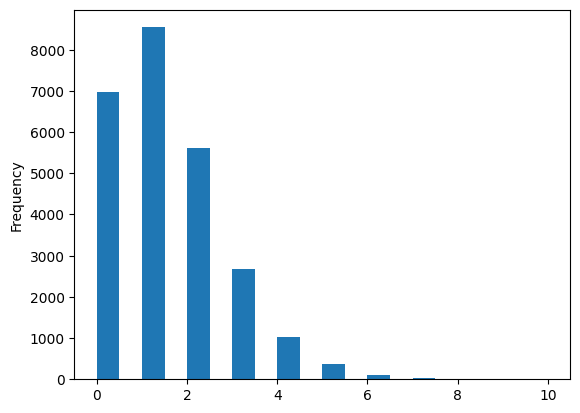

In [47]:
teamstats_data['goals'].plot.hist(bins=20)

In [48]:
# pegar apenas as informações dos jogos do teamid 89
teamstats_data[teamstats_data['teamID'] == 89].value_counts('result')


result
W    140
D     72
L     54
dtype: int64

<AxesSubplot: ylabel='Frequency'>

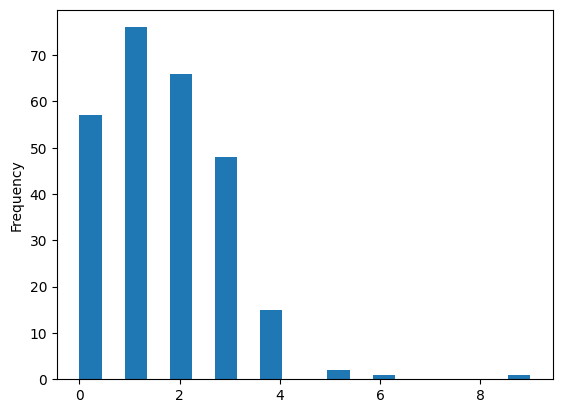

In [49]:
# plotar o histograma de gols do time 89
teamstats_data[teamstats_data['teamID'] == 89]['goals'].plot.hist(bins=20)

In [53]:
# procurar o jogador com nome 'David de Gea'
players_data[players_data['name'] == 'David de Gea']
# selecionar todas as appearances do jogador 'David de Gea'
appearances_data[appearances_data['playerID'] == 546]

,gameID,playerID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,xAssists,position,positionOrder,yellowCard,redCard,time,substituteIn,substituteOut,leagueID
1267,127,546,0,0,0,0.0,0.000000,0.000000,0,0,0.0,GK,1,0,0,90,0,0,1
1616,139,546,0,0,0,0.0,0.000000,0.000000,0,0,0.0,GK,1,0,0,90,0,0,1
1794,146,546,0,0,0,0.0,0.000000,0.000000,0,0,0.0,GK,1,0,0,90,0,0,1
2194,160,546,0,0,0,0.0,0.000000,0.000000,0,0,0.0,GK,1,0,0,90,0,0,1
2356,166,546,0,0,0,0.0,0.000000,0.000000,0,0,0.0,GK,1,0,0,90,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312466,14673,546,0,0,0,0.0,0.016491,0.016491,0,0,0.0,GK,1,0,0,90,0,0,1
312668,14681,546,0,0,0,0.0,0.049010,0.049010,0,0,0.0,GK,1,0,0,90,0,0,1
312794,14685,546,0,0,0,0.0,0.019558,0.019558,0,0,0.0,GK,1,0,0,90,0,0,1
315595,14788,546,0,0,0,0.0,0.000000,0.000000,0,0,0.0,GK,1,0,0,90,0,0,1


In [57]:
# procurar o jogador com nome 'Cristiano Ronaldo'
players_data[players_data['name'] == 'Cristiano Ronaldo']
# selecionar todas as appearances do jogador 'Cristiano Ronaldo' ordenadas por goals
appearances_data[appearances_data['playerID'] == 2371].sort_values('goals', ascending=False)

,gameID,playerID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,xAssists,position,positionOrder,yellowCard,redCard,time,substituteIn,substituteOut,leagueID
37161,1420,2371,5,0,7,3.226308,3.414285,0.000000,1,3,0.931255,AML,13,0,0,90,0,0,4
132014,5510,2371,5,0,13,3.503829,3.372064,0.117822,0,2,0.178014,FWL,16,0,0,90,0,0,4
180725,8163,2371,4,0,10,1.981282,2.834422,0.891114,1,3,0.273945,FW,15,0,0,90,0,0,4
140246,5806,2371,4,0,11,2.658385,1.398949,0.274232,0,3,0.160417,FW,15,0,0,90,0,0,4
44056,1669,2371,4,0,7,1.474623,0.889459,0.000000,0,0,0.000000,FWL,16,0,0,90,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173986,7920,2371,0,0,12,1.169365,1.424727,0.199471,0,1,0.296198,FW,15,0,0,90,0,0,4
138645,5748,2371,0,0,6,1.201879,3.406955,0.029047,2,5,2.224484,FWL,16,0,0,90,0,0,4
136532,5672,2371,0,0,3,0.115328,0.073922,0.024640,0,2,0.054036,FWL,16,0,1,82,0,0,4
135993,5653,2371,0,0,4,0.299168,0.668145,0.271723,1,1,0.097253,FWL,16,1,0,90,0,0,4


In [58]:
appearances_data[appearances_data['playerID'] == 2371].value_counts('goals')

goals
0    87
1    83
2    37
3    12
4     3
5     2
dtype: int64

In [61]:
appearances_data[appearances_data['playerID'] == 2371].value_counts('redCard')

redCard
0    223
1      1
dtype: int64

In [62]:
# tirar a média de gols do jogador 'Cristiano Ronaldo'
appearances_data[appearances_data['playerID'] == 2371]['goals'].mean()

0.9598214285714286

In [65]:
# tirar a média de gols do jogador 'Lionel Messi'
players_data[players_data['name'] == 'Lionel Messi']
appearances_data[appearances_data['playerID'] == 2097]['goals'].mean()

0.9506172839506173